# Lab 1: Nearest Neighbor Regression and Overfitting

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model, neighbors
from pathlib import Path
%matplotlib inline
plt.style.use('ggplot')
sns.set()

# Where to save the figures

PROJECT_ROOT_DIR = datapath = Path.home() / "Documents/lpthw/projects/DavisSML_lab1"
datapath = PROJECT_ROOT_DIR / "data"

In [5]:
oecd_bli = pd.read_csv(datapath / "oecd_bli_2015.csv")
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.columns

Index(['Air pollution', 'Dwellings without basic facilities',
       'Educational attainment', 'Employees working very long hours',
       'Employment rate', 'Feeling safe walking alone at night',
       'Homicide rate', 'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure',
       'Labour market insecurity', 'Life expectancy', 'Life satisfaction',
       'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Rooms per person',
       'Self-reported health',
       'Stakeholder engagement for developing regulations', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education'],
      dtype='object', name='Indicator')

In [6]:
oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      7.0
Belgium      6.9
Brazil       6.6
Canada       7.3
Name: Life satisfaction, dtype: float64

In [9]:
gdp_per_capita = pd.read_csv(
    datapath / 'gdp_per_capita.csv', 
    thousands= ',',
    delimiter= ',',
    encoding= 'latin1',
    na_values= 'n/a')
gdp_per_capita.rename(columns= {'2015': 'gdp_per_capita'}, inplace= True)

In [12]:
gdp_per_capita.set_index('Country', inplace= True)

In [13]:
full_country_stats = pd.merge(
    left= oecd_bli, 
    right= gdp_per_capita, 
    left_index= True,
    right_index= True)

In [23]:
full_country_stats.sort_values(by="gdp_per_capita", inplace = True)

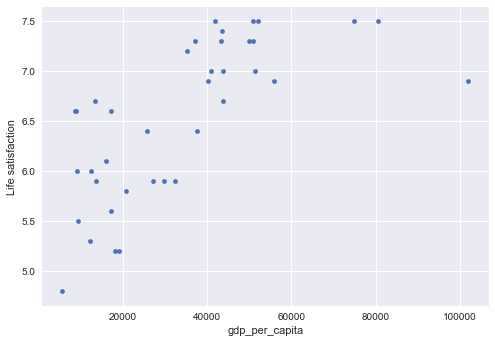

In [24]:
plot1 = full_country_stats.plot("gdp_per_capita",
                                "Life satisfaction",
                                kind = "scatter")

In [28]:
xvars = ['Self-reported health', 
         'Water quality', 
         'Quality of support network',
         'gdp_per_capita']

In [29]:
X = np.array(full_country_stats[xvars])

In [30]:
y = np.array(full_country_stats['Life satisfaction'])

In [37]:
def loo_risk(X, y, regmod):
    """ Construct the leave-one-out square error risk for a regression model
    
    Input: design matrix, X, response vector, y, regression model, regmod
    Output: scalar LOO risk
    """
    loo = LeaveOneOut()
    #loo.get_n_splits(X)
    loo_losses = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regmod.fit(X_train, y_train)
        y_hat = regmod.predict(X_test)
        loss = np.sum((y_hat - y_test)**2)
        loo_losses.append(loss)
    return np.mean(loo_losses)


def emp_risk(X, y, regmod):
    """
    Return the empirical risk for square error loss
    
    Input: design matrix, X, response vector, y, regression model, regmod
    Output: scalar empirical risk
    """
    regmod.fit(X, y)
    y_hat = regmod.predict(X)
    return np.mean((y_hat - y)**2)

In [38]:
lin1 = linear_model.LinearRegression(fit_intercept=False)
print('LOO Risk: ' + str(loo_risk(X, y, lin1)))
print('Emp Risk: ' + str(emp_risk(X, y, lin1)))

LOO Risk: 0.2950471135885104
Emp Risk: 0.22168789146095652


In [132]:
loo_risks = []
emp_risks = []
k_counter=list(range(1,31))
for i in k_counter:
    knnmod = neighbors.KNeighborsRegressor(n_neighbors=i)
    loo_risks.append(loo_risk(X, y, knnmod))
    emp_risks.append(emp_risk(X, y, knnmod))

In [133]:
my_array=np.concatenate(([loo_risks],[emp_risks]))

In [134]:
my_df=pd.DataFrame(data=my_array.T, columns=["loo_risks", "emp_risks"], index=k_counter)

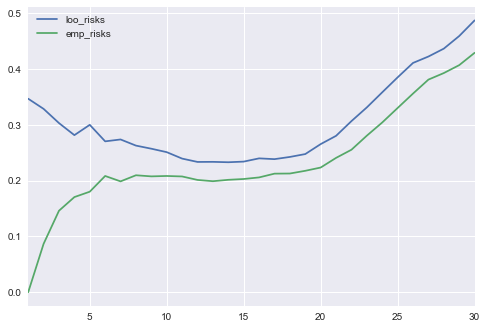

In [136]:
my_df.plot()

In [138]:
xvars2 = ['Self-reported health']
X = np.array(full_country_stats[xvars2])

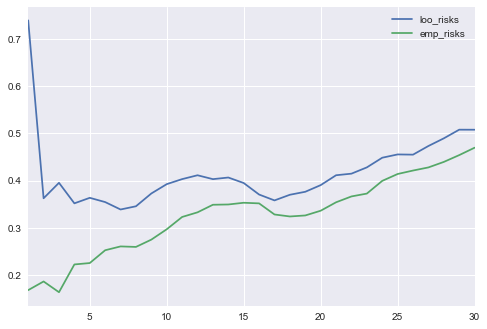

In [139]:
loo_risks = []
emp_risks = []
k_counter=list(range(1,31))
for i in k_counter:
    knnmod = neighbors.KNeighborsRegressor(n_neighbors=i)
    loo_risks.append(loo_risk(X, y, knnmod))
    emp_risks.append(emp_risk(X, y, knnmod))
my_array=np.concatenate(([loo_risks],[emp_risks]))
my_df=pd.DataFrame(data=my_array.T, columns=["loo_risks", "emp_risks"], index=k_counter)
my_df.plot()